TODO
create venv to wrap up all installation programatically
set the experiment name in mlflow dynamically
update teh target name dynamic after db repo integration

In [ ]:
# ⚙️ Install required packages in the notebook itself
# !pip install --quiet --upgrade pip
!pip install mlflow scikit-learn
!pip install pandas
!pip install numpy
!pip install jupyter
!pip install shap


In [ ]:
!pip install scikit-learn

In [ ]:
!pip uninstall numpy
!pip install numpy --force-reinstall --upgrade
!pip uninstall shap
!pip install shap --upgrade
!pip install mkl

In [46]:
# import mlflow
# import mlflow.sklearn
# import mlflow.shap
# import mlflow.data
# import mlflow.tracing
# from mlflow.tracking import MlflowClient
# import mlflow.environment_variables as mlenv
# import mlflow.utils.environment
# import mlflow.system_metrics as sys_metric
# import mlflow.projects
# import platform

# import time
# import psutil
# import shap
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
import git  
import mlflow
from mlflow import MlflowClient
import time
import psutil
import platform
import sklearn
import pandas as pd
import numpy as np
import matplotlib
import seaborn
import json
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, confusion_matrix,
    precision_score, recall_score, f1_score, roc_curve
)
import shap
import seaborn as sns
import matplotlib.pyplot as plt
os.environ["MLFLOW_SYSTEM_METRICS_ENABLED"] = "true"


In [47]:
# Set experiment name
# ============================
# 🔧 Configuration
# ============================
project_dir = os.getcwd()
tracking_dir = os.path.join(project_dir, "mlruns")
mlflow.set_tracking_uri("mlrunlogs/mlflow.db")
# ✅ setting the mlflow logs in the local folder 
print("Tracking URI set to:", mlflow.get_tracking_uri())

mlflow.set_experiment("RandomForest-Iris-CSV")


Tracking URI set to: mlrunlogs/mlflow.db


<Experiment: artifact_location='file:///C:/Users/reema/OneDrive/Dokumente/Provenance_tracking_thesis/Provenence-Tracking-Thesis-Research/notebooks/RQ_notebooks/mlrunlogs/mlflow.db/350083769514222255', creation_time=1744653654888, experiment_id='350083769514222255', last_update_time=1744653654888, lifecycle_stage='active', name='RandomForest-Iris-CSV', tags={}>

In [48]:
# ============================
# 📥 Load Data from CSV
# ============================
# Read data from CSV file
df = pd.read_csv("C:/Users/reema/OneDrive/Dokumente/Provenance_tracking_thesis/Provenence-Tracking-Thesis-Research/data/Iris.csv")
# Use the last column as the target variable
X = df.iloc[:, :-1]  # All columns except the last one are features
y = df.iloc[:, -1]   # The last column is the target

# Create a dataset object with mlflow.data
dataset = mlflow.data.from_pandas(df, name="Iris Dataset")

In [49]:
# Dataset Metadata to be logged 'TODO_update based on DBREPO LOG
dataset_metadata = {
    "dataset_name": "Iris Dataset",
    "dataset_version": "1.0.0",  # or use a Git commit hash or timestamp
    "dataset_source_url_or_path": "C:/Users/reema/OneDrive/Dokumente/Provenance_tracking_thesis/Provenence-Tracking-Thesis-Research/data/Iris.csv",
    "dataset_size_bytes": os.path.getsize("C:/Users/reema/OneDrive/Dokumente/Provenance_tracking_thesis/Provenence-Tracking-Thesis-Research/data/Iris.csv"),
    "dataset_shape": f"{df.shape[0]} x {df.shape[1]}",
    "dataset_format": "CSV",
    "feature_names": list(X.columns),
    "feature_types": [str(X[col].dtype) for col in X.columns],
    "target_column": y.name,
    "class_distribution": y.value_counts().to_dict(),
    "missing_value_strategy": "None",  # Update based on your strategy (e.g., imputation or dropping missing values)
    "scaling_encoding_steps": "None",  # Update if any scaling or encoding is performed
    "data_split_method": "Train-test split (80-20)",
    "data_random_seed": 42,  # Random state for reproducibility
    "preprocessing_pipeline": "None",  # Or provide a path or summary of preprocessing steps
}

In [50]:
# Capture Git commit hash (if code is in a git repo) 👈 **Git Commit for every run**
repo_dir = "https://github.com/reema-dass26/Provenence-Tracking-Thesis-Research"  # Replace with your repo path
repo = git.Repo(repo_dir)
commit_hash = repo.head.object.hexsha  # Capturing Git commit hash of the code used

# Automatically commit the code with each run 👈 **New**
commit_message = f"Training model with new data and versioning - Model Version {commit_hash}"
repo.git.add(A=True)  # Staging all changes
repo.index.commit(commit_message)  # Committing the changes
repo.remotes.origin.push()  # Push the commit to the remote repository (optional)

# Capture system information for environment logging
python_version = sys.version
platform_info = platform.system()

NoSuchPathError: C:\Users\reema\OneDrive\Dokumente\Provenance_tracking_thesis\Provenence-Tracking-Thesis-Research\notebooks\RQ_notebooks\https:\github.com\reema-dass26\Provenence-Tracking-Thesis-Research

2025/04/14 21:19:07 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/14 21:19:09 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


Model 'RandomForest_IrisDataset_v1.0.0' already exists. Registering a new version...


2025/04/14 21:19:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'RandomForest_IrisDataset_v1.0.0' already exists. Creating a new version of this model...
Created version '5' of model 'RandomForest_IrisDataset_v1.0.0'.
C:\Users\reema\AppData\Local\Temp\ipykernel_14504\3809603253.py:49: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  model_versions = client.get_latest_versions(model_name)


✅ Model logged and registered as: RandomForest_IrisDataset_v1.0.0, Version: 5
✅ Model logged and registered as: RandomForest_IrisDataset_v1.0.0


2025/04/14 21:19:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
C:\Users\reema\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\reema\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:1153: UserWarning: The figure layout has changed to tight
  pl.tight_layout()
C:\Users\reema\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:761: UserWarning: The figure layout has changed to tight
  pl.tight_layout(pad=0, w_pad=0, h_pad=0.0)


Run logged with ID: 93ea99f16950474fba94c72d1453c63c


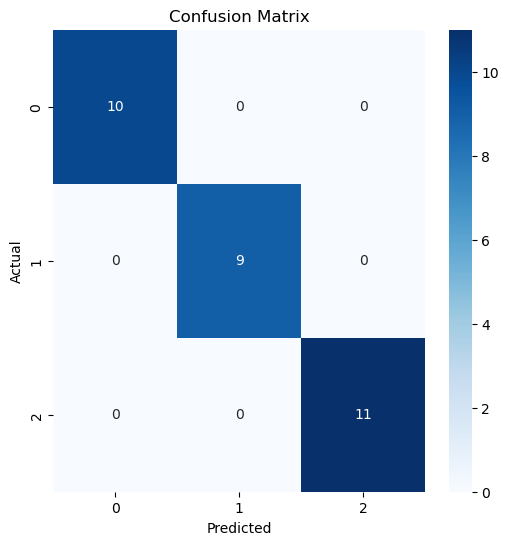

<Figure size 640x480 with 0 Axes>

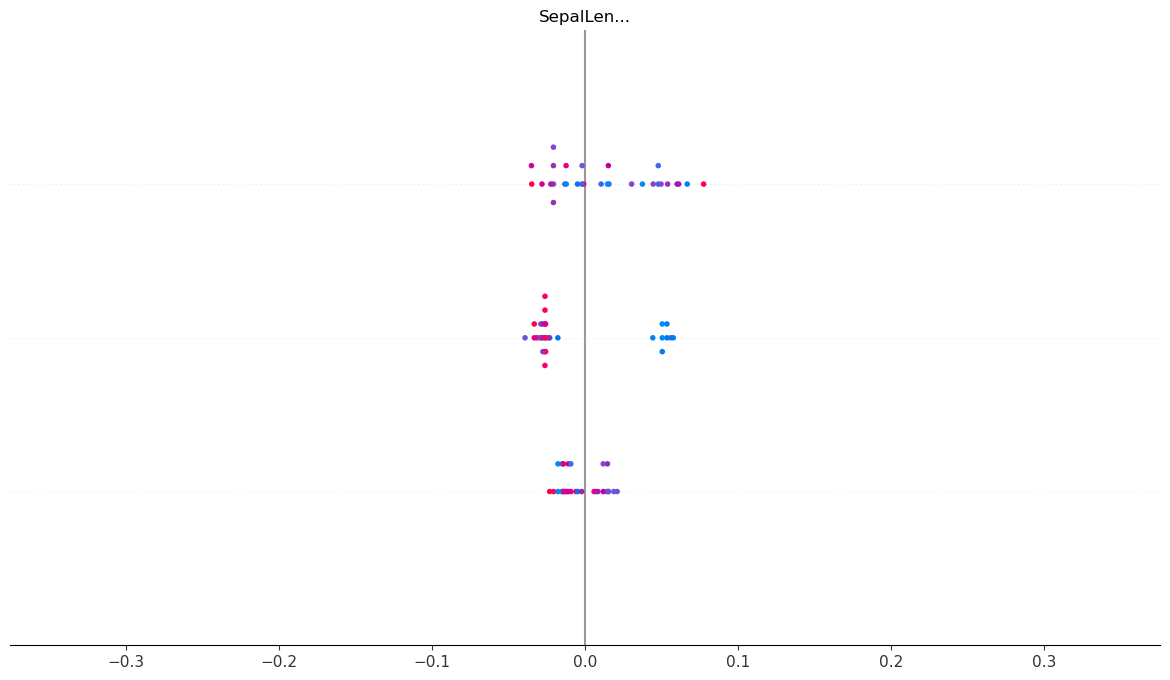

In [43]:
# 🧠 MLflow Autologging Enabled
mlflow.autolog(log_input_examples=True, log_model_signatures=True)
# ============================
# 🚀 Start MLflow Run
# ============================

# ✅ Logging Dataset Metadata
with mlflow.start_run() as run:
    # Track system metrics manually
    cpu_before = psutil.cpu_percent(interval=1)
    mem_before = psutil.virtual_memory().percent
    training_time_start  = time.time()


    # Log dataset metadata
    mlflow.log_params(dataset_metadata)


     # Define dynamic model name
    model_name = f"RandomForest_{dataset_metadata['dataset_name'].replace(' ', '')}_v{dataset_metadata['dataset_version']}"

    # Use the MLflow client to check if the model already exists
    client = MlflowClient()
     # Check if model already exists
    existing_models = client.search_registered_models()
    model_registered = False

    for model in existing_models:
        if model.name == model_name:
            model_registered = True
            break

    # Register the model or update with a new version
    if model_registered:
        print(f"Model '{model_name}' already exists. Registering a new version...")
        mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path="model",
            registered_model_name=model_name
        )
    else:
        print(f"Registering new model '{model_name}'...")
        mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path="model",
            registered_model_name=model_name
        )
         # Fetch the model version after logging it
    model_versions = client.get_latest_versions(model_name)
    latest_version = model_versions[0].version if model_versions else None
    mlflow.log_param("model_name", model_name)  
    mlflow.log_param("model_version", latest_version)
    mlflow.log_param("all_model_version", model_versions)  


    print(f"✅ Model logged and registered as: {model_name}, Version: {latest_version}")

    print(f"✅ Model logged and registered as: {model_name}")

    # Save input data as CSV and log it
    Xy = X.copy()
    Xy["target"] = y
    data_path = "iris_dataset.csv"
    Xy.to_csv(data_path, index=False)
    mlflow.log_artifact(data_path, artifact_path="input_data")

   # Model training
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    training_time_end = time.time()
    training_time = training_time_end - training_time_start
    cpu_after = psutil.cpu_percent(interval=1)
    mem_after = psutil.virtual_memory().percent


     # Log base params
    mlflow.log_params({
        "model_type": type(model).__name__,
        "model_library": "scikit-learn",
        "dataset_source": "DBrepo",
        "training_time_start": training_time_start,
        "training_time_end": training_time_end
    })

     # Log full model hyperparameters
    mlflow.log_params(model.get_params())

    # Log metrics
    mlflow.log_metrics({
        "cpu_before": cpu_before,
        "cpu_after": cpu_after,
        "mem_before": mem_before,
        "mem_after": mem_after,
        "training_duration_seconds": training_time
    })


    # Log input features
    mlflow.log_param("model_input_features", list(X.columns))

    # Log script path
    mlflow.log_param("training_script_path", "RQ1.ipynb")  # or use __file__ if script

      # Log Python, OS, and libraries
    mlflow.log_params({
        "python_version": platform.python_version(),
        "os_platform": f"{platform.system()} {platform.release()}",
        "sklearn_version": sklearn.__version__,
        "pandas_version": pd.__version__,
        "numpy_version": np.__version__,
        "matplotlib_version": matplotlib.__version__,
        "seaborn_version": seaborn.__version__,
        "virtual_env": os.environ.get("VIRTUAL_ENV") or os.environ.get("CONDA_DEFAULT_ENV", "not_detected")
    })

     # Log model
    mlflow.sklearn.log_model(model, "random_forest_model")

    # Evaluation
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba, multi_class="ovr")
    mlflow.log_metrics({
        "accuracy": acc,
        "roc_auc": auc,
        "precision": precision_score(y_test, y_pred, average='macro'),
        "recall": recall_score(y_test, y_pred, average='macro'),
        "f1_score": f1_score(y_test, y_pred, average='macro')
    })
    
    # Log parameters and metrics
    mlflow.log_params({
        "model": "RandomForestClassifier",
        "n_estimators": 100,
        "dataset_source": "DBrepo"
    })

 
  
   # Confusion Matrix
    confusion = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    cm_path = "confusion_matrix.png"
    plt.savefig(cm_path)
    mlflow.log_artifact(cm_path)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1], pos_label=1)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    roc_path = "roc_curve.png"
    plt.savefig(roc_path)
    mlflow.log_artifact(roc_path)

    # SHAP
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, show=False)
    shap_path = "shap_summary.png"
    plt.savefig(shap_path)
    mlflow.log_artifact(shap_path)

    # Feature importance
    feat_imp = pd.DataFrame({
        "Feature": X.columns,
        "Importance": model.feature_importances_
    }).sort_values(by="Importance", ascending=False)
    feat_path = "feature_importance.csv"
    feat_imp.to_csv(feat_path, index=False)
    mlflow.log_artifact(feat_path)

    # 🗃️ Save and log dataset as artifact
    Xy = X.copy()
    Xy["target"] = y
    data_path = "iris_dataset.csv"
    Xy.to_csv(data_path, index=False)
    mlflow.log_artifact(data_path, artifact_path="input_data")
    
  # Input schema
    input_schema = X.dtypes.astype(str).to_dict()
    with open("input_schema.json", "w") as f:
        json.dump(input_schema, f)
    mlflow.log_artifact("input_schema.json")

    # Output schema
    output_schema = {
        "output_type": str(type(y_pred[0])),
        "classes": model.classes_.tolist()
    }
    with open("output_schema.json", "w") as f:
        json.dump(output_schema, f)
    mlflow.log_artifact("output_schema.json")

    # Register model
    model_uri = f"runs:/{run.info.run_id}/random_forest_model"
    # mlflow.register_model(model_uri, "RandomForest_Iris_CSV_Model")
    print(f"Run logged with ID: {run.info.run_id}")
    mlflow.end_run()

mlflow.set_experiment("RandomForest-Iris-CSV")
client = MlflowClient()

